In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm

# 맑은 고딕 폰트 사용
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df = pd.read_csv(url)

In [4]:
# 1. 기본 정보 확인
print("데이터셋 기본 정보:")
print(df.info())
print("\n데이터셋 처음 5행:")
print(df.head())

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

데이터셋 처음 5행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26

In [6]:
# 2. 결측치 확인 및 처리
print("\n결측치 확인:")
print(df.isnull().sum())

# 0값을 가진 열 확인 (일부 열에서 0은 실제로 결측치일 수 있음)
zero_counts = (df == 0).sum()
print("\n각 열의 0 값 개수:")
print(zero_counts)

# 의미 없는 0값을 NaN으로 변경 (예: Glucose, BloodPressure, SkinThickness, Insulin, BMI)
columns_to_modify = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_modify:
    df[column] = df[column].replace(0, np.nan)

print("\n0값을 NaN으로 변경 후 결측치 확인:")
print(df.isnull().sum())

# 결측치 처리 (여기서는 중앙값으로 대체)
df = df.fillna(df.median())


결측치 확인:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

각 열의 0 값 개수:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

0값을 NaN으로 변경 후 결측치 확인:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
# 3. 레이블 확인
print("\n레이블(Outcome) 분포:")
print(df['Outcome'].value_counts(normalize=True))


레이블(Outcome) 분포:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


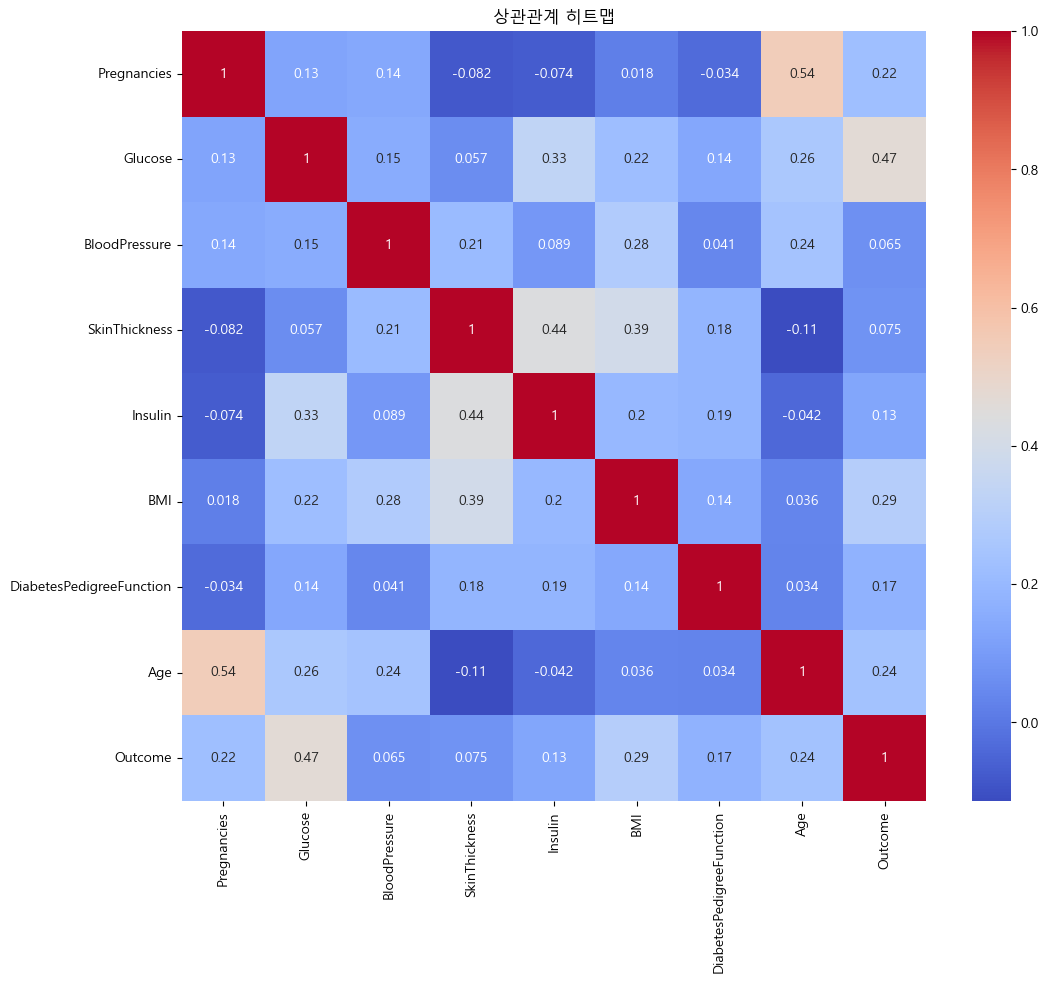

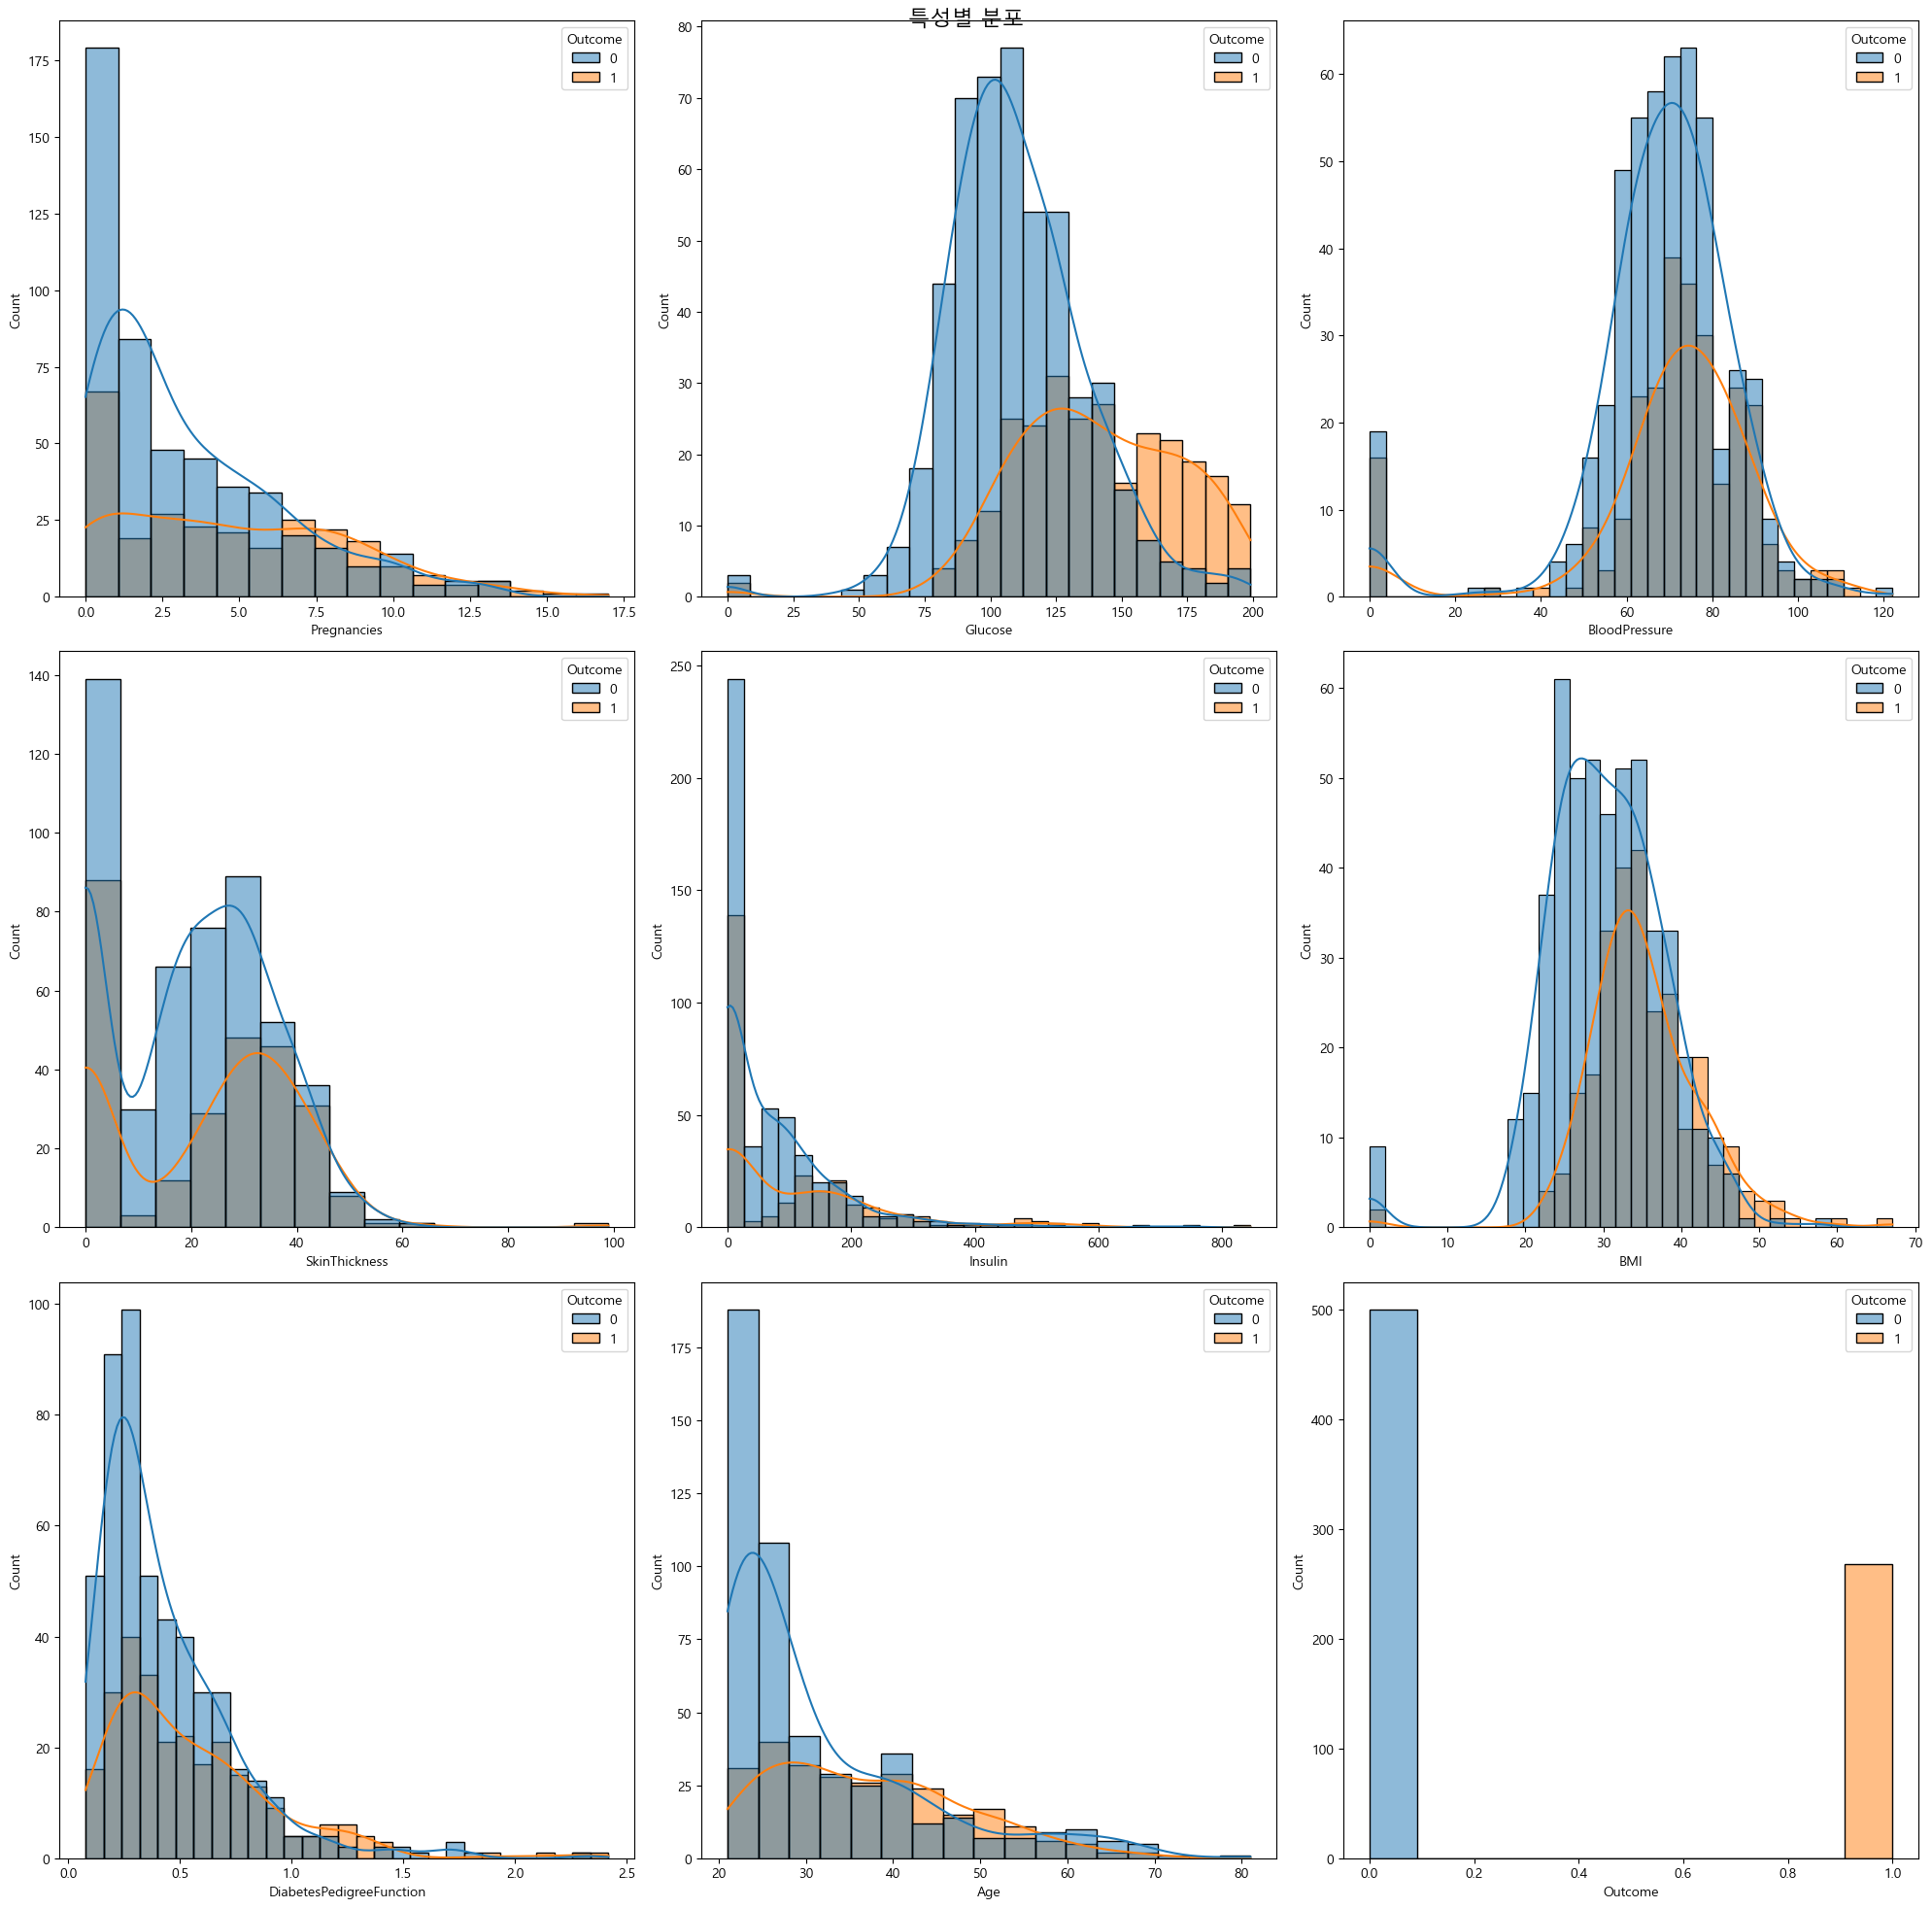

In [20]:
# 4. 데이터 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

# 각 특성의 분포 시각화
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('특성별 분포', fontsize=16)
for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

In [12]:
# 5. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['Outcome'] = df['Outcome']

print("\n스케일링 된 데이터 처음 5행:")
print(scaled_df.head())


스케일링 된 데이터 처음 5행:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [14]:
# 6. 레이블 인코딩 (이미 0과 1로 인코딩되어 있으므로 추가 작업 불필요)

print("\n최종 처리된 데이터셋 정보:")
print(scaled_df.info())


최종 처리된 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
